In [ ]:
from trainers import CNNTrainer, NasTrainer
from const import *
import torch

trainer = NasTrainer(SOFTSTEP, CIFAR10, path=RESIDUALCIFAR10)
trainer.load_model()


In [ ]:
for imgs, label in trainer.train_loader:
    if torch.cuda.is_available():
        imgs = imgs.cuda(DEVICE)
        label = label.cuda(DEVICE)
    preds = trainer.model(imgs)

# size_vectors = trainer.model.generate_size_vector()
# for tmp in size_vectors:
#     print(tmp)


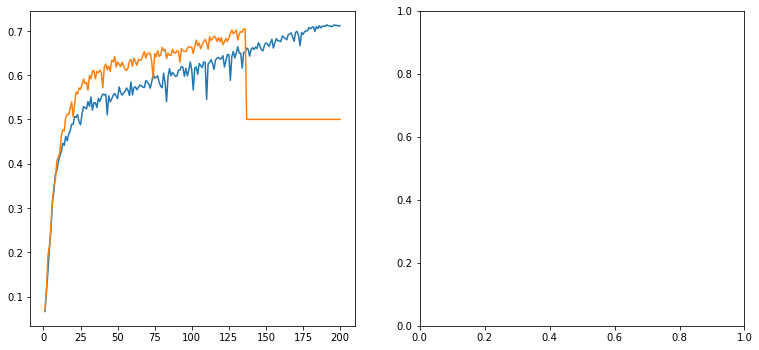

In [1]:
import numpy as np,re
import matplotlib.pyplot as plt


def analyse_trainloss(path, order=1):
    pattern_trainloss = re.compile("train_loss:(\d.\d+),")
    pattern_valaccu = re.compile("val_accu:(\d.\d+),")
    data = []
    with open(path, 'r') as f:
        for line in f.readlines():
            if line.__contains__("Epoch"):
                data.append((re.findall(pattern_trainloss, line)[
                            0], re.findall(pattern_valaccu, line)[0]))
    while len(data) < 200:
        data.append((0.5,0.5))
    data = np.array(data)
    data = data.astype(float)
    return data[:,0], data[:,1]


train_loss, val_accu = analyse_trainloss("log/softstep_linear_cifar100_1e-5.log")
train_loss_b, val_accu_b = analyse_trainloss(
    "log/softstep_bottleneck_cifar100_1e-5.log")

fig, axes = plt.subplots(1,2,figsize=(6.4*2,5.8))
plt.subplot(121)
# plt.plot([tmp+1 for tmp in range(len(train_loss))], train_loss)
plt.plot([tmp+1 for tmp in range(len(val_accu))], val_accu)
# plt.subplot(122)
# plt.plot([tmp+1 for tmp in range(len(train_loss_b))], train_loss_b)
plt.plot([tmp+1 for tmp in range(len(val_accu_b))], val_accu_b)
